# CMSC320 Final Tutorial
# Prediction of Temperature

Haiyang Wang

## The Topic:
Because the weather system around the world changes rapidly, and the parameters are too many and confusing, it is difficult to use specific formulas or equations to predict the future weather.

Therefore, I want to try a machine learning approach to see if it is possible to predict the future daily weather through past weather data. I think I can start to predict future daily temperature. I'm going to use different approaches to find the one that works best for forecasting the daily weather to get the best results possible.

## Some Tips
If you fail to run the plot to plot images, because it repeatedly kill the kernel, this might caused by Asyncio errors. To avoid this you can run the notebook in this way instead:

jupyter notebook --NotebookApp.kernel_manager_class=notebook.services.kernels.kernelmanager.AsyncMappingKernelManager

This part refer to https://github.com/jupyter/notebook/issues/6219 and https://github.com/jupyter/notebook/issues/6164

If the plot problem is still exist, please refer to https://stackoverflow.com/questions/69786885/after-conda-update-python-kernel-crashes-when-matplotlib-is-used , which might be help. 

If you find that 'OMP: Error #15: Initializing libiomp5md.dll, but found mk2iomp5md.dll already initialized.' exists when running jupyter notebook, you can refer to https://stackoverflow.com/questions/20554074/sklearn-omp-error-15-initializing-libiomp5md-dll-but-found-mk2iomp5md-dll-a to seek any help.

In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
from azureml.opendatasets import NoaaIsdWeather
from datetime import datetime
from dateutil.relativedelta import relativedelta
warnings.filterwarnings('ignore')

# Part 1 Collection of Data

I will use the data from NOAA Integrated Surface Data, which contains surface weather around the world from over 30000 stations. I will use the method NoaaIsdWeather() to collect all the data. This method is provided by Microsoft Azure. The specific implementation method can be viewed on this website (https://github.com/Azure/OpenDatasetsNotebooks/blob/master/tutorials/data-access/02-weather-to-pandas-dataframe.ipynb).
This method can return the temperature from different locations, which mean the amound of data is very huge. To Avoid wasting storage space, I decide to focus on the temperature just around the DC area (Latitude: 38.8951 Longitude: -77.0364).

During the collection, however, I have found that this consume too much time and memory since the functions return too much information that some them is not needed at all. So I collect the data from each year seperately. The only data I will collect are datatime, latitude, longitude and temperature. This will help me save my memory space as much as possible. I will store these data in the form of w20xx.csv file.

If anyone wants to save time, I suggest skip this part and download the w20xx.csv files. This part consumes lots of memory and time.

In [2]:
#Here is the process to collect the weather data from 2017 to 2021.
#Unfortunatelly, The database doesn't seem to contain every day of the year.

#Start and end
start_date = datetime(2017, 1, 1)
end_date =  datetime(2017, 12, 31)

#collect data
isd = NoaaIsdWeather(start_date, end_date,['datetime','latitude','longitude','temperature'])

#transform to pandas dataframe
isd_df = isd.to_pandas_dataframe()

#select DC area
isd_df = isd_df.loc[(isd_df['latitude'] >= 38) & (isd_df['latitude'] <= 39) & (isd_df['longitude'] >= -78) & (isd_df['longitude'] <= -77)]
isd_df = isd_df.sort_values(by='datetime')
isd_df = isd_df[['datetime','latitude','longitude','temperature']]

#store the csv file
isd_df.to_csv('w2017.csv')

#Repeat Process
start_date = datetime(2018, 1, 1)
end_date =  datetime(2018, 12, 31)
isd = NoaaIsdWeather(start_date, end_date,['datetime','latitude','longitude','temperature'])
isd_df = isd.to_pandas_dataframe()
isd_df = isd_df.loc[(isd_df['latitude'] >= 38) & (isd_df['latitude'] <= 39) & (isd_df['longitude'] >= -78) & (isd_df['longitude'] <= -77)]
isd_df = isd_df.sort_values(by='datetime')
isd_df = isd_df[['datetime','latitude','longitude','temperature']]
isd_df.to_csv('w2018.csv')

start_date = datetime(2019, 1, 1)
end_date =  datetime(2019, 12, 31)
isd = NoaaIsdWeather(start_date, end_date,['datetime','latitude','longitude','temperature'])
isd_df = isd.to_pandas_dataframe()
isd_df = isd_df.loc[(isd_df['latitude'] >= 38) & (isd_df['latitude'] <= 39) & (isd_df['longitude'] >= -78) & (isd_df['longitude'] <= -77)]
isd_df = isd_df.sort_values(by='datetime')
isd_df = isd_df[['datetime','latitude','longitude','temperature']]
isd_df.to_csv('w2019.csv')

start_date = datetime(2020, 1, 1)
end_date =  datetime(2020, 12, 31)
isd = NoaaIsdWeather(start_date, end_date,['datetime','latitude','longitude','temperature'])
isd_df = isd.to_pandas_dataframe()
isd_df = isd_df.loc[(isd_df['latitude'] >= 38) & (isd_df['latitude'] <= 39) & (isd_df['longitude'] >= -78) & (isd_df['longitude'] <= -77)]
isd_df = isd_df.sort_values(by='datetime')
isd_df = isd_df[['datetime','latitude','longitude','temperature']]
isd_df
isd_df.to_csv('w2020.csv')

#Data ends at May 2021
start_date = datetime(2021, 1, 1)
end_date =  datetime(2021, 12, 21)
isd = NoaaIsdWeather(start_date, end_date,['datetime','latitude','longitude','temperature'])
isd_df = isd.to_pandas_dataframe()
isd_df = isd_df.loc[(isd_df['latitude'] >= 38) & (isd_df['latitude'] <= 39) & (isd_df['longitude'] >= -78) & (isd_df['longitude'] <= -77)]
isd_df = isd_df.sort_values(by='datetime')
isd_df = isd_df[['datetime','latitude','longitude','temperature']]
isd_df.to_csv('w2021.csv')

[Info] read from C:\Users\10339\AppData\Local\Temp\tmpj0to9ip2\https%3A\%2Fazureopendatastorage.azurefd.net\isdweatherdatacontainer\ISDWeather\year=2017\month=1\part-00000-tid-5175975263333548477-7aeb615b-cca2-42d5-99cc-5022a6daac8d-2609-1.c000.snappy.parquet
[Info] read from C:\Users\10339\AppData\Local\Temp\tmpj0to9ip2\https%3A\%2Fazureopendatastorage.azurefd.net\isdweatherdatacontainer\ISDWeather\year=2017\month=1\part-00001-tid-5175975263333548477-7aeb615b-cca2-42d5-99cc-5022a6daac8d-2605-1.c000.snappy.parquet
[Info] read from C:\Users\10339\AppData\Local\Temp\tmpj0to9ip2\https%3A\%2Fazureopendatastorage.azurefd.net\isdweatherdatacontainer\ISDWeather\year=2017\month=1\part-00002-tid-5175975263333548477-7aeb615b-cca2-42d5-99cc-5022a6daac8d-2607-1.c000.snappy.parquet
[Info] read from C:\Users\10339\AppData\Local\Temp\tmpj0to9ip2\https%3A\%2Fazureopendatastorage.azurefd.net\isdweatherdatacontainer\ISDWeather\year=2017\month=1\part-00003-tid-5175975263333548477-7aeb615b-cca2-42d5-99cc-

# Part 2 Data Management

I read data from the CSV files. I drop any row that contains missing values. 
Since I am basically focus on the daily temperature, a new column is created, which is called "date" that represents only the date information. Since that I can calculate the mean of temperature data in one day. I also delete the information that I did not use in the future part, like 'latitude' and 'longitude'. In this part I only keep the date and temperature.

In [3]:
# Read Data
isd_df = pd.read_csv('w2017.csv')

# Drop value
isd_df = isd_df.dropna()

# Create the date column
isd_df['date'] = isd_df.apply(lambda row: str(row.datetime)[0:10], axis=1)

# Remove unuseful data
isd_df = isd_df[['date','temperature']]

# Calculate the mean temperature for every day
isd_df = isd_df.groupby('date').mean()
isd_df

,temperature
date,
2017-01-01,7.327972
2017-01-02,6.300692
2017-01-03,6.517524
2017-01-04,8.995238
2017-01-05,0.911695
...,...
2017-12-27,-1.481212
2017-12-28,-7.106721
2017-12-29,-5.933537


Here temperature represents the average temperature

In [4]:
# Update the file to the new one
isd_df.to_csv('w2017_1.csv')

# Do same for tha data from 2018 to 2021
isd_df = pd.read_csv('w2018.csv')
isd_df = isd_df.dropna()
isd_df['date'] = isd_df.apply(lambda row: str(row.datetime)[0:10], axis=1)
isd_df = isd_df[['date','temperature']]
isd_df = isd_df.groupby('date').mean()
isd_df.to_csv('w2018_1.csv')

isd_df = pd.read_csv('w2019.csv')
isd_df = isd_df.dropna()
isd_df['date'] = isd_df.apply(lambda row: str(row.datetime)[0:10], axis=1)
isd_df = isd_df[['date','temperature']]
isd_df = isd_df.groupby('date').mean()
isd_df.to_csv('w2019_1.csv')

isd_df = pd.read_csv('w2020.csv')
isd_df = isd_df.dropna()
isd_df['date'] = isd_df.apply(lambda row: str(row.datetime)[0:10], axis=1)
isd_df = isd_df[['date','temperature']]
isd_df = isd_df.groupby('date').mean()
isd_df.to_csv('w2020_1.csv')

isd_df = pd.read_csv('w2021.csv')
isd_df = isd_df.dropna()
isd_df['date'] = isd_df.apply(lambda row: str(row.datetime)[0:10], axis=1)
isd_df = isd_df[['date','temperature']]
isd_df = isd_df.groupby('date').mean()
isd_df.to_csv('w2021_1.csv')

# Part 3: Visualization

Now, I will use the saved files to do some analysis instead of being overwhelmed by the flood of data from the original database. Before the start of analyzing, I combine the temperature data into two DataFrames. First one will contain average temperature of each day and second one will just contain average temperature of each month. A groupby function to sort the data is used. The data for 2021 is incomplete, so this section does not consider 2021 for now.

In [5]:
# Average temperature per month
Avg_temp_per_mon = None
# Average temperature per day
Avg_temp_per_day = None

#Read data from each year
for i in range(2017,2021):
    Year = pd.read_csv("w"+ str(i) +"_1.csv")
    Month = Year.copy()
    Day = Year.copy()
    Month['date'] = Month.apply(lambda row: str(row.date)[5:7], axis=1)
    Month = Month.rename(columns={"date":"month"})
    Month = Month.groupby('month').mean()
    
    #Group by Day, take the mean
    Day['date'] = Day.apply(lambda row: str(row.date)[5:10], axis=1)
    Day = Day.groupby('date').mean()
    
    # Put temperature data into the dataframes
    if i == 2017:
        Avg_temp_per_mon = Month.copy().rename(columns={"temperature": "temperature_2017", "date":"month"})
    else:
        Avg_temp_per_mon["temperature_"+ str(i)] = Month["temperature"]

    if i == 2017:
        Avg_temp_per_day = Day.copy().rename(columns={"temperature": "temperature_2017"})
    else:
        Avg_temp_per_day["temperature_"+ str(i)] = Day["temperature"]

Avg_temp_per_day

,temperature_2017,temperature_2018,temperature_2019,temperature_2020
date,,,,
01-01,7.327972,-9.574132,13.037563,4.736576
01-02,6.300692,-9.550000,6.097679,2.887814
01-03,6.517524,-8.771891,7.402119,10.032107
01-04,8.995238,-3.459494,3.810424,11.769565
01-05,0.911695,-8.404303,8.343328,6.165049
...,...,...,...,...
12-27,-1.481212,1.780290,6.059762,-1.426233
12-28,-7.106721,8.153070,7.949648,4.102772
12-29,-5.933537,9.109333,8.995678,4.035742


In [6]:
Avg_temp_per_mon

,temperature_2017,temperature_2018,temperature_2019,temperature_2020
month,,,,
01,4.856666,0.745066,1.646986,4.740344
02,8.186317,6.663374,4.350292,5.797596
03,7.879036,4.994242,7.070025,10.948296
04,16.805265,11.799273,15.255233,12.049605
05,17.612875,21.196281,20.401757,16.744295
06,23.328552,22.829835,23.006440,23.328091
07,25.685452,24.723617,26.223509,27.066091
08,23.103541,24.910098,24.579848,24.648758
09,20.062609,22.400255,22.622308,19.586389


## Part 3.1 Data Visualization

Plot the dataframes using matplotlib.pyplot.

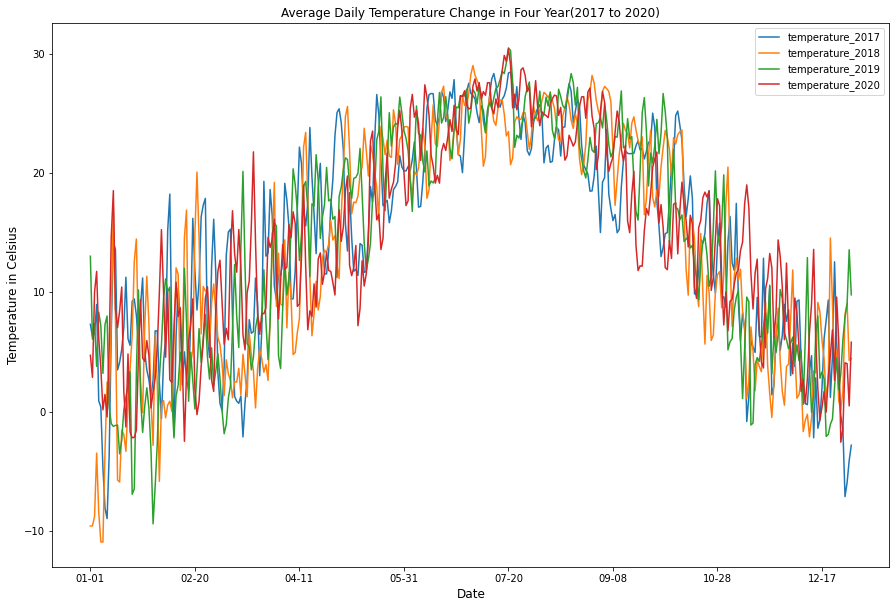

In [7]:
#Plot for daily temperature
fig, ax = plt.subplots(figsize=(15, 10))
Avg_temp_per_day.plot(ax = ax)
plt.title("Average Daily Temperature Change in Four Year(2017 to 2020)")
plt.ylabel("Temperature in Celsius", size = 12)
plt.xlabel("Date", size = 12)
plt.show()

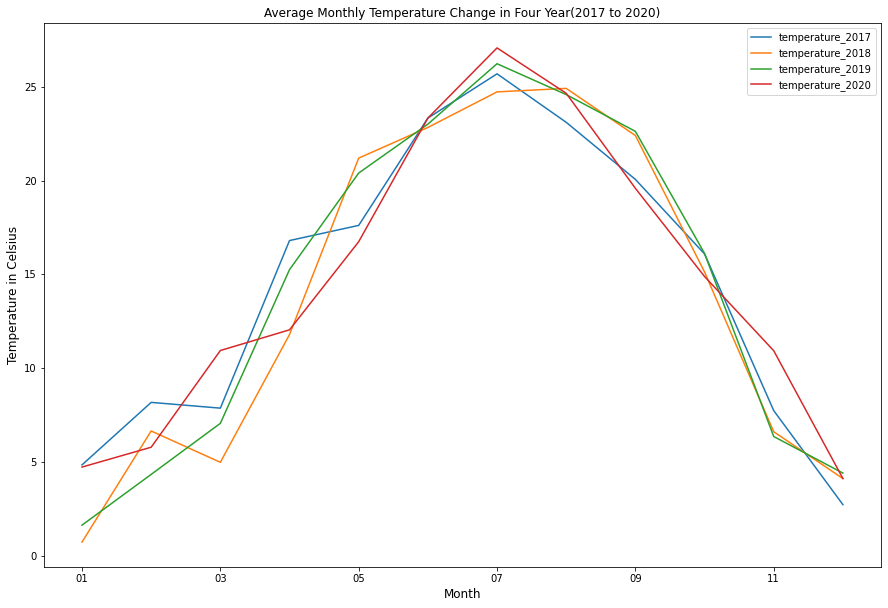

In [8]:
#Plot for monthly temperature
fig, ax = plt.subplots(figsize=(15, 10))
Avg_temp_per_mon.plot(ax = ax)
plt.title("Average Monthly Temperature Change in Four Year(2017 to 2020)")
plt.ylabel("Temperature in Celsius", size = 12)
plt.xlabel("Month", size = 12)
plt.show()

From the above two plots, even though the average temperature for each day or each month varies a lot, there is still a general trend of how temperature changes within a single year. It will increase until the time near July or August, and start to decrease later until the next year. How the temperatures are distributed within each month is shown by using violin plot below.

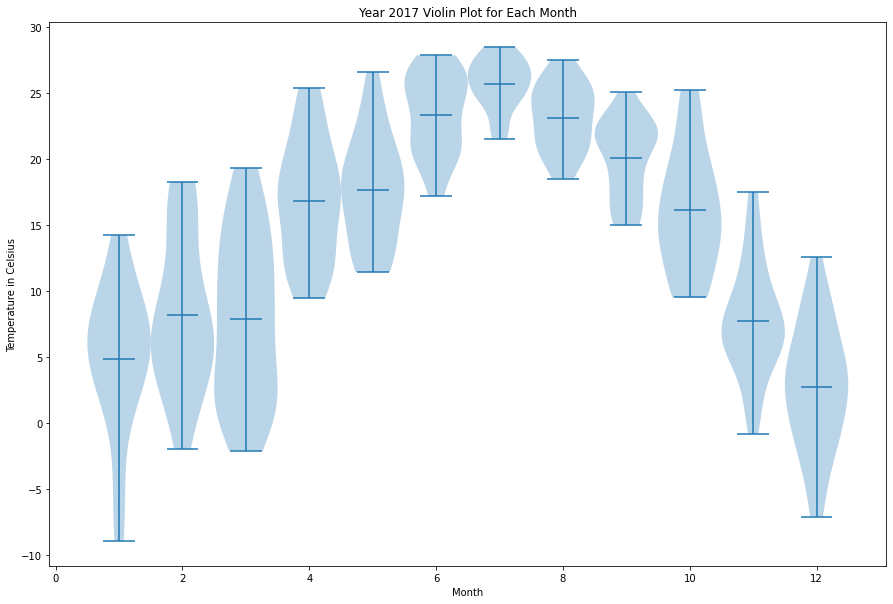

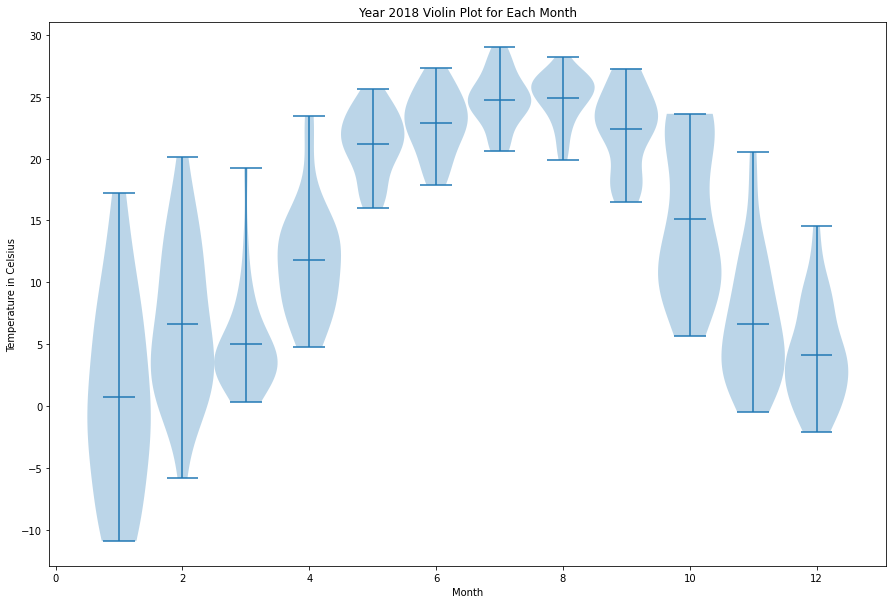

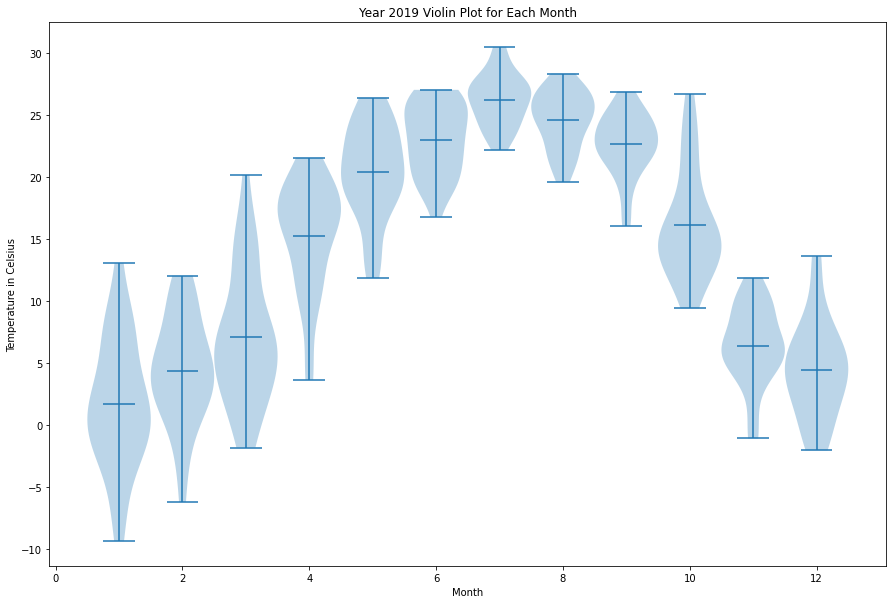

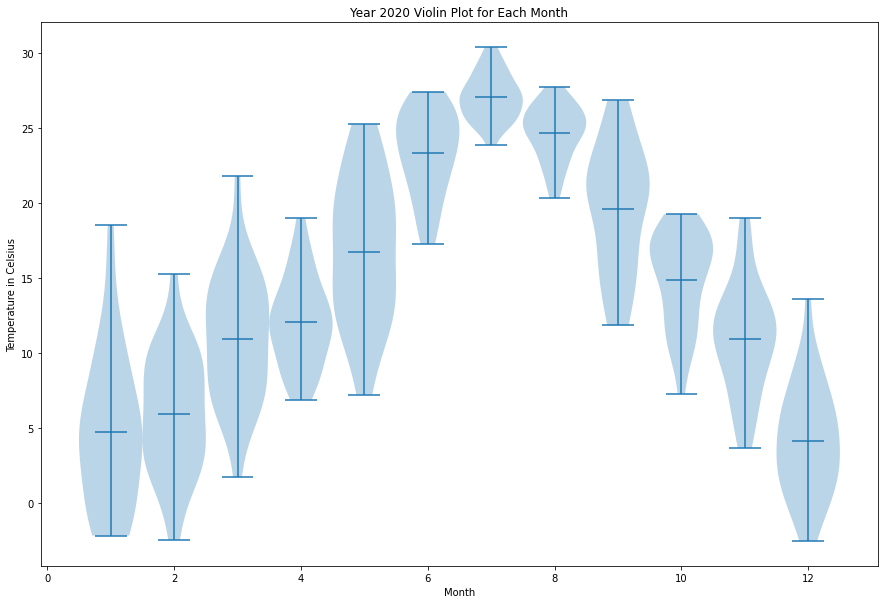

In [9]:
#Process data for violin plot
Month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
dates = np.array(Avg_temp_per_day.index)
Month_list_num = [1,2,3,4,5,6,7,8,9,10,11,12]
for year in Avg_temp_per_day.columns:
    t_per_year = []
    for i in range(0, 12):
        t_per_month = []
        for x in range(0,365):
            if dates[x][0:2] == Month_list[i]:
                t_per_month.append(Avg_temp_per_day[year].iloc[x])
        t_per_year.append(t_per_month)
    
    #Violin plot
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.violinplot(t_per_year,Month_list_num,widths=1,showmeans=True)
    plt.xlabel("Month")
    plt.ylabel("Temperature in Celsius")
    plt.title("Year " +year[12:] + " Violin Plot for Each Month")
    plt.show()

Plots above shows the temperature distribution in each month. The distribution is quite different for each year. This indicate that weather can change rapidly and randomly in just a single area. There are no outliers also.

# Part 4: Hypothesis Testing & Machine Learning

## Part 4.1 polynomial regression

From the previous section, the trend in temperature changes over the years is shown. The line of the trend seems to look like a shape of hyperbola. I decide to use a polynomial regression with a degree 2 to predict the daily temperature for each day in the year.

## Get the Data

In [10]:
isd_df1 = pd.read_csv('w2017_1.csv')
isd_df2 = pd.read_csv('w2018_1.csv')
isd_df3 = pd.read_csv('w2019_1.csv')
isd_df4 = pd.read_csv('w2020_1.csv')
isd_df5 = pd.read_csv('w2021_1.csv')

## Find the Model

Use the temperature data from 2017 to find the model.

In [11]:
z = np.poly1d(np.polyfit(range(1,366),isd_df1['temperature'], 2))
z

poly1d([-7.29352439e-04,  2.74125249e-01, -3.10932747e+00])

The model is:

$temperature = -7.29352439e-04*x^2 + 2.74125249e-01*x - 3.10932747e+00$

## Comparing the Result

After I found the model, I use the model to see if polynomial regression is appropriate. I choose to plot the data and analyze the difference between the actual value and the predicted value.

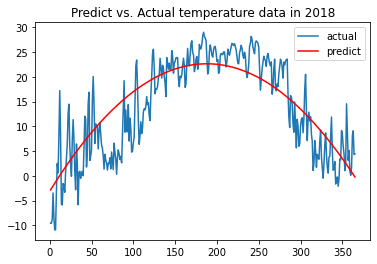

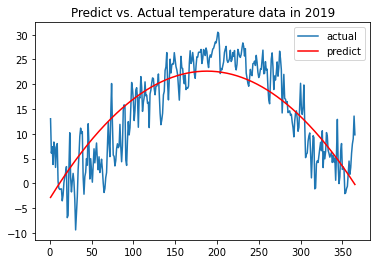

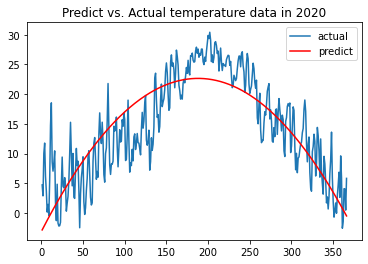

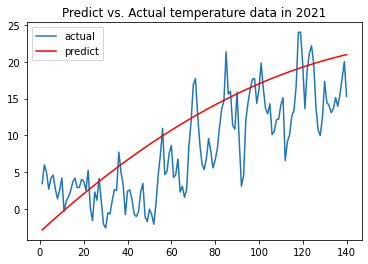

In [12]:
#Plot the actual data and the predicted data

#2018
plt.plot(range(1,366), isd_df2['temperature'],label='actual')
xp = np.linspace(1, 365, 365)
plt.title('Predict vs. Actual temperature data in 2018')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2019
plt.plot(range(1,366),isd_df3['temperature'],label='actual')
xp = np.linspace(1, 365, 365)
plt.title('Predict vs. Actual temperature data in 2019')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2020
plt.plot(range(1,367),isd_df4['temperature'],label='actual')
xp = np.linspace(1, 366, 366)
plt.title('Predict vs. Actual temperature data in 2020')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2021, the data from 2021 is incomplete, it ends at May.
plt.plot(range(1,141),isd_df5['temperature'],label='actual')
xp = np.linspace(1, 140, 140)
plt.title('Predict vs. Actual temperature data in 2021')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

To show the difference between the predicted data and the actual data, the total sum of the square difference is been calculated using the formula:

$r^2 = (actual - predicted)^2$ 

In [13]:
# The function of total differences

def find_residual(list1, list2):
    residual = list(map(lambda x, y: (x-y)**2, list1, list2))
    print(sum(residual))

In [14]:
#Plot the residuals
#2018
y_data = []
xp = np.linspace(1, 365, 365)
for i in isd_df2['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2018:")
find_residual(y_data,pre_list)
print()

#2019
y_data = []
xp = np.linspace(1, 365, 365)
for i in isd_df3['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2019:")
find_residual(y_data,pre_list)
print()

#2020
y_data = []
xp = np.linspace(1, 366, 366)
for i in isd_df4['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2020:")
find_residual(y_data,pre_list)
print()

#2021
y_data = []
xp = np.linspace(1, 121, 121)
for i in isd_df5['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2021:")
find_residual(y_data,pre_list)

Residual in year 2018:
10369.300031162498

Residual in year 2019:
8777.352868795171

Residual in year 2020:
8397.156631554324

Residual in year 2021:
3720.3324993811757


The residual is quite large for each year. I decide to use the model with a higher degree. I chose to try degree 6.

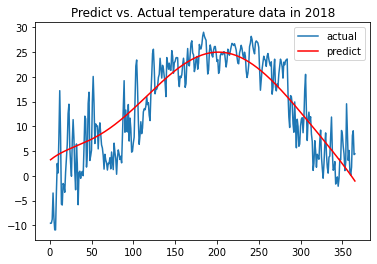

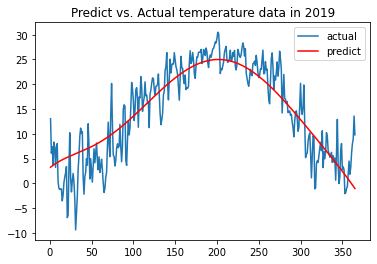

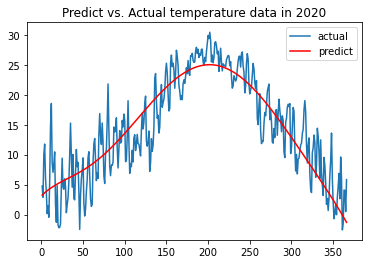

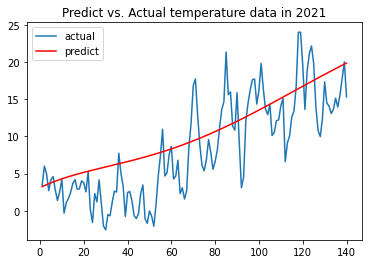

Residual in year 2018:
8178.108046199709

Residual in year 2019:
6389.332134600588

Residual in year 2020:
5558.093757916219

Residual in year 2021:
2911.87157386326


In [15]:
# find z for new degree
z = np.poly1d(np.polyfit(range(1,366),isd_df1['temperature'], 6))

#Plot data
#2018 vs
plt.plot(range(1,366), isd_df2['temperature'],label='actual')
xp = np.linspace(1, 365, 365)
plt.title('Predict vs. Actual temperature data in 2018')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2019 vs
plt.plot(range(1,366),isd_df3['temperature'],label='actual')
xp = np.linspace(1, 365, 365)
plt.title('Predict vs. Actual temperature data in 2019')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2020 vs
plt.plot(range(1,367),isd_df4['temperature'],label='actual')
xp = np.linspace(1, 366, 366)
plt.title('Predict vs. Actual temperature data in 2020')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2021 vs
plt.plot(range(1,141),isd_df5['temperature'],label='actual')
xp = np.linspace(1, 140, 140)
plt.title('Predict vs. Actual temperature data in 2021')
plt.plot(xp, z(xp), c='r',label='predict')
plt.legend()
plt.show()

#2018 residual
y_data = []
xp = np.linspace(1, 365, 365)
for i in isd_df2['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2018:")
find_residual(y_data,pre_list)
print()

#2019 residual
y_data = []
xp = np.linspace(1, 365, 365)
for i in isd_df3['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2019:")
find_residual(y_data,pre_list)
print()

#2020 residual
y_data = []
xp = np.linspace(1, 366, 366)
for i in isd_df4['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2020:")
find_residual(y_data,pre_list)
print()

#2021 residual
y_data = []
xp = np.linspace(1, 140, 140)
for i in isd_df5['temperature']:
    y_data.append(i)
pre_list = z(xp)
print("Residual in year 2021:")
find_residual(y_data,pre_list)

Residual does decrease some how. However, there might be problems for polynomial regression model. 
No matter which degree is being used, the equation will always get the same prediction for the same day in a different year. 

Even though the general trend of each year is very similar to each other, there still might a very big difference in the daily temperature. From the violin plot, the temperature distribution for the same month of different years is having variation. 

Hence, even though the equation using polynomial regression represents the overall trend of temperature, it cannot predict the daily precisely unfortunately.

## Part 4.2 Long Short-term Memory

To solve the problem in 4.1, new ways are needed for more precise results.
I think that the temperature of current day might depend on the past few days. 
In other words, the trend of temperature changes over the past few days may largely be an important factor in predicting the current day temperature.I decide to find the trend of past few days temperature to predict the current day temperature.

To achieve the goal, I choose to use an recurrent neural network (RNN). 

In an RNN, the output could be used as part of the next input.This allows the data model to iterate and improve itself.    Therefore, I can show the temporal dynamic behavior using RNN. 
To avoid the potential problem of vanishing gradient, I chose to use long short-term memory (LSTM, a kind of RNN).

PyTorch is used to train the model. CUDA is also used in the first place to have better performance.

## Parameters
I set up some parameters for later training.

In [16]:
# Characteristic dimension
input_size = 4

hidden_size = 8
output_size = 1

# number of layer
num_layers = 2

# In a year, there are 362 four-day sequence.
seq_len = 362

## Data normalization
I use linear scaling to normalize the data using the formula shown below: 

$x^{'} = （x - x_{min}）/  (x_{max} - x_{min})$

This method could help me easily find the upper and lower bounds on the data with few outliers from the violin plot.



## Training dataset

I use the temperature data from 2017 as the training set.

The training input set will be a list of 4-day sequences (4 is characteristic dimension), and the target set will be a list of the 5th-day temperature. 

In [17]:
# Read data
isd_df = pd.read_csv('w2017_1.csv')
data = isd_df['temperature']

# Find xmin and xmax
x_min = np.min(data)
x_max = np.max(data)

# normalization
scalar = x_max - x_min
data = list(map(lambda x: (x - x_min) / scalar, data))

# Get training data
train_x = []
train_y = []
for i in range(len(data)-input_size):
    train_x.append(data[i:i+input_size])
    train_y.append(data[i+input_size])
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
train_x = train_x.reshape(-1, 1, input_size)
train_y = train_y.reshape(-1, 1, output_size)
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)

## Create LSTM model

Use the parameter and Pytorch to create a LSTM model.

In [18]:
# Model creation
class RNN(torch.nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layers):
        super(RNN, self).__init__() 
        self.lstm = torch.nn.LSTM(input_size,hidden_size,num_layers)
        self.out = torch.nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        out = self.out(x1.view(-1,c))
        out1 = out.view(a,b,-1)
        return out1

rnn = RNN(input_size,hidden_size,output_size,num_layers)

# loss function and optimizer
optimizer = torch.optim.Adam(rnn.parameters(),lr = 1e-1)
criterion = torch.nn.MSELoss()

## Training 

To prevent overfitting, I decide to try 250 steps.

In [19]:
# Check if our system supports CUDA
# If CUDA is not available, updata CUDA, pytorch and cudatoolkit to the newest version.
# https://pytorch.org/get-started/locally/ might be helpful
is_cuda = torch.cuda.is_available()

# If so, enable the cude
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available")

GPU is available


In [20]:
# start training
for i in range(250):
    inputs = train_x.type(torch.FloatTensor)
    inputs = inputs.cuda()
    labels = train_y.type(torch.FloatTensor)
    labels = labels.cuda()
    rnn.cuda()
    out = rnn(inputs)
    loss = criterion(out,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%10==0:
        print('Step:{}, Loss:{:.5f}'.format(i+1, loss.item()))

Step:10, Loss:0.05807
Step:20, Loss:0.05683
Step:30, Loss:0.05300
Step:40, Loss:0.04992
Step:50, Loss:0.04116
Step:60, Loss:0.01631
Step:70, Loss:0.01475
Step:80, Loss:0.01256
Step:90, Loss:0.01076
Step:100, Loss:0.00890
Step:110, Loss:0.00751
Step:120, Loss:0.00709
Step:130, Loss:0.00702
Step:140, Loss:0.00690
Step:150, Loss:0.00684
Step:160, Loss:0.00679
Step:170, Loss:0.00675
Step:180, Loss:0.00677
Step:190, Loss:0.00667
Step:200, Loss:0.00660
Step:210, Loss:0.00656
Step:220, Loss:0.00652
Step:230, Loss:0.00647
Step:240, Loss:0.00643
Step:250, Loss:0.00637


The loss is decreasing during the training.

## Testing step

The model is trained, I decide to do some test for my model.I use a similar method as I did in the training step to get the testing input and actual output. 

By comparing the training output with the actual output, whether the model could predict the daily temperature well using the past four days' temperature can be shown.

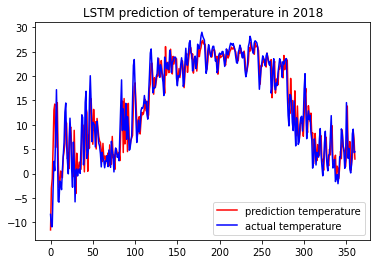

<Figure size 720x360 with 0 Axes>

Residual for 2018
3858.4005925455067


In [21]:
# Getting the test data
isd_df = pd.read_csv('w2018_1.csv')

# Normalize the data
data = isd_df['temperature']
min_d = np.min(data)
max_d = np.max(data)
scalar = max_d - min_d
data_nomalized = list(map(lambda x: (x - min_d) / scalar, data))

# Getting the testing input and actual temperature dataset
x_data = []
y_data = []
for i in range(len(data)-input_size):
    x_data.append(data_nomalized[i:i+input_size])
    y_data.append(data[i+input_size])
x_data = np.asarray(x_data)
x_data = x_data.reshape(-1, 1, input_size)
x_data = torch.from_numpy(x_data)
var_x = x_data.type(torch.FloatTensor)
var_x = var_x.cuda()

# Using our model to predict the daily temperature.
pre = rnn(var_x)
pre = pre.cpu()

# Convert the normalized data back to actural temperature data
pre_list = pre.view(-1).data.numpy().tolist()
pre_list = list(map(lambda x: (x*scalar)+min_d, pre_list))

# Create the plot
plt.title("LSTM prediction of temperature in 2018")
plt.plot(pre_list, 'r', label='prediction temperature')
plt.plot(y_data, 'b', label='actual temperature')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

print("Residual for 2018")
find_residual(pre_list,y_data)

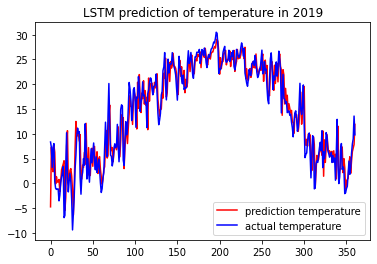

<Figure size 720x360 with 0 Axes>

Residual for 2019
3214.845434823356


In [22]:
# Getting the test data
isd_df = pd.read_csv('w2019_1.csv')

# Normalize the data
data = isd_df['temperature']
min_d = np.min(data)
max_d = np.max(data)
scalar = max_d - min_d
data_nomalized = list(map(lambda x: (x - min_d) / scalar, data))

# Getting the testing input and actual temperature dataset
x_data = []
y_data = []
for i in range(len(data)-input_size):
    x_data.append(data_nomalized[i:i+input_size])
    y_data.append(data[i+input_size])
x_data = np.asarray(x_data)
x_data = x_data.reshape(-1, 1, input_size)
x_data = torch.from_numpy(x_data)
var_x = x_data.type(torch.FloatTensor)
var_x = var_x.cuda()

# Using our model to predict the daily temperature.
pre = rnn(var_x)
pre = pre.cpu()

# Convert the normalized data back to actural temperature data
pre_list = pre.view(-1).data.numpy().tolist()
pre_list = list(map(lambda x: (x*scalar)+min_d, pre_list))

# Create the plot
plt.title("LSTM prediction of temperature in 2019")
plt.plot(pre_list, 'r', label='prediction temperature')
plt.plot(y_data, 'b', label='actual temperature')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

print("Residual for 2019")
find_residual(pre_list,y_data)

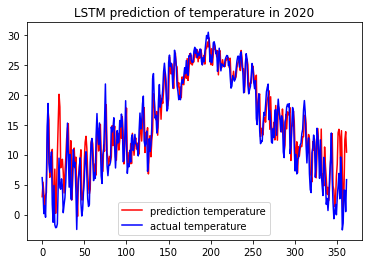

<Figure size 720x360 with 0 Axes>

Residual for 2020
4167.6975728550005


In [23]:
# Getting the test data
isd_df = pd.read_csv('w2020_1.csv')

# Normalize the data
data = isd_df['temperature']
data = isd_df['temperature']
min_d = np.min(data)
max_d = np.max(data)
scalar = max_d- min_d
data_nomalized = list(map(lambda x: (x - min_d) / scalar, data))

# Getting the testing input and actual temperature dataset
x_data = []
y_data = []
for i in range(len(data)-input_size):
    x_data.append(data_nomalized[i:i+input_size])
    y_data.append(data[i+input_size])
x_data = np.asarray(x_data)
x_data = x_data.reshape(-1, 1, input_size)
x_data = torch.from_numpy(x_data)
var_x = x_data.type(torch.FloatTensor)
var_x = var_x.cuda()

# Using our model to predict the daily temperature.
pre = rnn(var_x)
pre = pre.cpu()

# Convert the normalized data back to actural temperature data
pre_list = pre.view(-1).data.numpy().tolist()
pre_list = list(map(lambda x: (x*scalar)+min_d, pre_list))

# Create the plot
plt.title("LSTM prediction of temperature in 2020")
plt.plot(pre_list, 'r', label='prediction temperature')
plt.plot(y_data, 'b', label='actual temperature')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

print("Residual for 2020")
find_residual(pre_list,y_data)

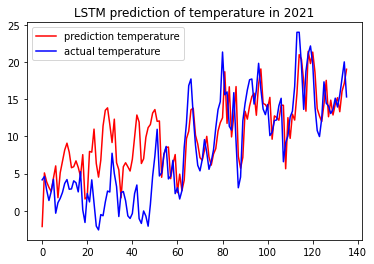

<Figure size 720x360 with 0 Axes>

Residual for 2021
3253.111712094932


In [24]:
# Getting the test data
isd_df = pd.read_csv('w2021_1.csv')

# Normalize the data
data = isd_df['temperature']
min_d = np.min(data)
max_d = np.max(data)
scalar = max_d - min_d
data_nomalized = list(map(lambda x: (x - min_d) / scalar, data))

# Getting the testing input and actual temperature dataset
x_data = []
y_data = []
for i in range(len(data)-input_size):
    x_data.append(data_nomalized[i:i+input_size])
    y_data.append(data[i+input_size])
x_data = np.asarray(x_data)
x_data = x_data.reshape(-1, 1, input_size)
x_data = torch.from_numpy(x_data)
var_x = x_data.type(torch.FloatTensor)
var_x = var_x.cuda()

# Using our model to predict the daily temperature.
pre = rnn(var_x)
pre = pre.cpu()

# Convert the normalized data back to actural temperature data
pre_list = pre.view(-1).data.numpy().tolist()
pre_list = list(map(lambda x: (x*scalar)+min_d, pre_list))

# Create the plot
plt.title("LSTM prediction of temperature in 2021")
plt.plot(pre_list, 'r', label='prediction temperature')
plt.plot(y_data, 'b', label='actual temperature')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

print("Residual for 2021")
find_residual(pre_list,y_data)

## Part 4.3 Analysis

Comparing RNN with the polynomial regression model, there is a significant improvement in total difference in a year.

RNN model can also represent temporal dynamic behavior. From the plot generated, it can be found that RNN model can predict the sudden change of the data.

The temporal change captured using RNN model is nearly accurate comparing with the actual data.

# Part 5 Conclusion
From the comparison above, it can be found that LSTM (the special type of RNN) works better than polynomial regression in predicting the temperature. LTSM can also predict sudden changes of the data, which is much more powerful than polynomial regression.Hence, recurrent neural networks are very helpful to predict the data in a chaos, random system such as the weather system. The RNN model used in this project is still having problems, too many factors that might affect the weather is not included.

In this project, temperature is the only used input to avoid some peoblems. For better accuracy of the predection of weather, other features can be added, such as wind speed and cloud coverage. This can improve the RNN model used in this project. 

In the real weather system, weather differs form different locations. In the future, with better memory storage and calculating power, I can also add latitude and longitude as features.